Random Forest
Feature taken: LBP

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/"MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [5]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value

In [6]:
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

In [7]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

In [8]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [9]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/train/images/crazing/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(0)         #append all the class in y_train

  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
 

    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)

print(len(X_train))


180


In [10]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/train/images/inclusion/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(1)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

360


In [11]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/train/images/patches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(2)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)


print(len(X_train))

540


In [12]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/train/images/pitted_surface/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(3)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

727


In [13]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/train/images/rolled-in_scale/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(4)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

915


In [14]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/train/images/scratches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_train.append(img2)      #append all the pixel vector in X_train
  y_train.append(5)         #append all the class in y_train
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_train.append(img_lbp)



print(len(X_train))

1095


In [ ]:
# Testing

In [15]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/test/images/crazing/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(0)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)


print(len(X_test))

60


In [16]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/test/images/inclusion/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(1)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

120


In [17]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/test/images/patches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(2)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

180


In [18]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/test/images/pitted_surface/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(3)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

240


In [19]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/test/images/rolled-in_scale/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(4)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

300


In [20]:
path = "/content/drive/MyDrive/Colab Notebooks/NEU-DET/ images/test/images/scratches/*.jpg"
for file in glob.glob(path):     
#   img=cv2.imread(file)
#   img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#   X_test.append(img2)      #append all the pixel vector in X_test
  y_test.append(5)         #append all the class in y_test
  img_bgr = cv2.imread(file, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  X_test.append(img_lbp)

print(len(X_test))

362


In [21]:
print(X_train)

[array([[215, 191, 119, ..., 255,  61,  96],
       [223,  56,  64, ..., 188,  24,   0],
       [255,   0, 194, ...,  52, 254,   2],
       ...,
       [  5, 191, 123, ..., 225, 255,   2],
       [191, 125, 124, ..., 193, 253,   2],
       [  8,   8,   0, ..., 131, 141,   2]], dtype=uint8), array([[ 16, 176, 248, ..., 191,  63,  34],
       [254,   0, 193, ...,  93,  60,   0],
       [  4, 130, 255, ..., 254, 124,  34],
       ...,
       [129, 129, 128, ...,  24,  12,   2],
       [135, 135, 131, ...,  79,  15,   3],
       [135, 135, 139, ..., 134, 143,   3]], dtype=uint8), array([[ 32, 192, 192, ...,  36, 198, 163],
       [  0, 195, 163, ...,  32, 255,  33],
       [ 18, 255, 113, ...,  16, 253,  96],
       ...,
       [ 12,  26,   0, ..., 223,   2, 161],
       [  6, 255,   2, ..., 255,  62,  99],
       [ 10,  13,   2, ..., 141,   8,   0]], dtype=uint8), array([[254, 127, 127, ..., 216,  32, 224],
       [241, 248, 124, ..., 255,  16, 225],
       [241, 249,   4, ..., 221,  58, 

In [22]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [23]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1095, 200, 200) (1095,)
Test set: (362, 200, 200) (362,)


In [26]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [27]:
print(X_train.shape)

(1095, 40000)


In [28]:
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [29]:
print(X_test.shape)

(362, 40000)


In [30]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [31]:
train_accuracy = list()
test_accuracy = list()
no_of_estimators = list()

In [33]:
for i in range(10,100,5) :
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_train)
    #print("Train Accuracy:",metrics.accuracy_score(output_class, y_pred))
    train_accuracy.append(metrics.accuracy_score(y_train, y_pred))

    y_pred_test = clf.predict(X_test)
    #print("Test Accuracy:",metrics.accuracy_score(output_predict_class, y_pred_test))
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))

    no_of_estimators.append(i)

In [34]:
print(train_accuracy)
print(test_accuracy)
print(no_of_estimators)

[0.9872146118721461, 0.9990867579908675, 0.9990867579908675, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.2513812154696133, 0.24033149171270718, 0.2596685082872928, 0.24585635359116023, 0.2845303867403315, 0.23480662983425415, 0.26243093922651933, 0.2541436464088398, 0.2845303867403315, 0.27624309392265195, 0.24033149171270718, 0.2596685082872928, 0.24033149171270718, 0.2596685082872928, 0.2983425414364641, 0.26243093922651933, 0.2955801104972376, 0.2845303867403315]
[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


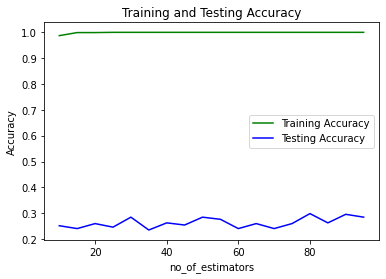

In [35]:
plt.plot(no_of_estimators, train_accuracy, 'g', label='Training Accuracy')
plt.plot(no_of_estimators, test_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('no_of_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
max(test_accuracy)

0.2983425414364641

In [37]:
clf=RandomForestClassifier(n_estimators=70)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

0.281767955801105
[[17  4  7 16 10  6]
 [ 3 24  5  5  6 17]
 [16  6 15  9 11  3]
 [ 9  5 13 18  9  6]
 [23  0 16  0 19  2]
 [ 4 23  6  9 11  9]]
              precision    recall  f1-score   support

           0       0.24      0.28      0.26        60
           1       0.39      0.40      0.39        60
           2       0.24      0.25      0.25        60
           3       0.32      0.30      0.31        60
           4       0.29      0.32      0.30        60
           5       0.21      0.15      0.17        62

    accuracy                           0.28       362
   macro avg       0.28      0.28      0.28       362
weighted avg       0.28      0.28      0.28       362



In [ ]:
# every class has almost similar precision, recall, f1 score t=that is low